complete coding is done based on the paper [SEES](SEES.pdf)

In [1]:
#we need to connect to a GUI event loop. This tells IPython where (and how) to display plots.
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import math

### we need 

N    - the total number of HN nodes

Fs   - scalability factor which define as the maximum number of nodes to be accommodated in a single zone

L    - length of area

B    - cardinality of local base station(LBS)

n    - number of heterogeneity level

If N is the total number of nodes and n is the number of heterogeneity levels, then the network has n categories (types) of nodes: cate-1, cate-2, cate-3, ..., cate-n nodes with their cardinalities: N1t , N2t , N3t , ..., Nnt and energy levels: E1t , E2t , E3t , ..., Ent respectively, where:

                            N1t > N2t > N3t > ⋯ > Nnt
                            
                            E1t < E2t < E3t < ⋯ < Ent
                            
The different levels of node energies are related according to the following formula, where the initial energy of cate-i
nodes is alpha times more than that of cate-(i − 1):

                            Eit = E1t × (1 + (i − 1) × aplha)
                            
where alpha is constant. The number of cate-i nodes in the network is given by:

                            Nit = N × (beta − gamma1) × (beta − gamma2) × (beta − gamma3)×⋯× (beta − gammai)
                            
                            N1t + N2t + N3t + ⋯ + Nnt  = N
                            
alpha and betai are the primary and secondary parameters of heterogeneity in the Singh model respectively (Singh 2017), and
are related according to the following formula:

            (beta − gamma1) × (1 + (beta − gamma2) × (1 + (beta − gamma3)×⋯× (1 + (beta − gamman)))) = 1

and gammai is given by:

                            gammai = gammai−1 − 2 × theta

where Θ(theta) is constant. The value of first secondary parameter gamma1 is predefined and must satisfy the following inequality:

                            gamma1 / (2 × (n − 1)) > Θ


In [2]:
#taking inputs
N = int(input("Enter N( the total number of HN nodes)"))
Fs = int(input("Enter Fs()"))
L = int(input("Enter L(length of area)"))
B = int(input("Enter B(LBS)"))
n = int(input("Enter n(number of heterogeneity level)"))

#taking constants
alpha = int(input("Enter alpha"))
#beta = input("Enter beta")
gamma = float(input("Enter gamma"))#intial gamma will be given
theta = float(input("Enter theta"))#should validate a equation

Einti = float(input("Enter E1(initial energy)"))
Etot = float(input("enter Etotal(total energy)"))

print(N,Fs,L,B,n,alpha,gamma,theta,Einti,Etot)
#setting parameters are given based 4.2 section setting parameters

Enter N( the total number of HN nodes)2000
Enter Fs()20
Enter L(length of area)200
Enter B(LBS)12
Enter n(number of heterogeneity level)5
Enter alpha2
Enter gamma0.4
Enter theta0.025
Enter E1(initial energy)0.5
enter Etotal(total energy)0.5
2000 20 200 12 5 2 0.4 0.025 0.5 0.5


In [3]:
#we need to validate theta and gamma values and find beta constant
if((gamma /  (2*(n-1)) ) > theta):
    print("proceed")
else:
    print("error in input values")
    
#first we need to find gammavalues for getting beta value
gammavalues = [gamma]
#getting gamma values
for i in range(1,n+1):
    #gammai = gammai-1 - 2*theta
    gammavalues.append(gammavalues[i-1] - 2*theta)
    
print(gammavalues)

#now we can proceed for beta values
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.roots.html#numpy.roots
product = [0]*(len(gammavalues)+1)
product = [float(product[i]) for i in range(len(product))]
#this represent an equation of coordinates of constant and beta
print(product)

equ1 = [-gamma,1.0]
for k in range(1,len(gammavalues)):
    equ2 = [1.0 - gammavalues[k],1.0]
        #this represent an equation of coordinates of beta and constant

    for i in range(0,len(equ1)):
        for j in range(0,len(equ2)):
            product[i+j] = product[i+j] + (equ1[i]*equ2[j])
    #print(equ1)
    equ1.clear()  # removes all items from list (equivalent to del list[:])
    for p in range(0,len(product)):
        if(product[p] != 0.0):
            equ1.append(product[p])
#     print(equ1)
#     equ1 = product
#     print(equ1)

product[0] = product[0] - 1
print(product)

print(np.roots(product))

#actually root should be the beta value

proceed
[0.4, 0.35000000000000003, 0.30000000000000004, 0.25000000000000006, 0.20000000000000007, 0.15000000000000008]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[-3.575754999999999, -3.3335975, 10.580212499999996, 25.225625, 20.4125, 7.35, 1.0]
[ 2.28135695+0.j         -0.94460355+0.60456808j -0.94460355-0.60456808j
 -0.45753791+0.16955036j -0.45753791-0.16955036j -0.40935196+0.j        ]


In [4]:
#we have taken beta as 1 for building temporarly
beta = 1
#testing
print(alpha,beta,gamma,gammavalues)
print(N,Fs,L,B,n,alpha,gamma,theta,Einti,Etot)

2 1 0.4 [0.4, 0.35000000000000003, 0.30000000000000004, 0.25000000000000006, 0.20000000000000007, 0.15000000000000008]
2000 20 200 12 5 2 0.4 0.025 0.5 0.5


In [5]:

Nt = [] #indicate cardinality of n categories
Et = [] #indicate Energy of n categories

    
for i in range(1,n+1):
    # we compute Nit and Eit and append them to Nt and Et,formulea are shown below
    #(Einti * (1 + ((i − 1) * alpha)))
    et = i-1
    et = et*alpha
    et = et+1
    et = et*Einti
    Et.append(et)
    #Nit = N × (beta − gamma1) × (beta − gamma2) × (beta − gamma3)×⋯× (beta − gammai)
    nt = N
    for j in range(0,i+1):
        nt = nt *(beta - gammavalues[j])
    Nt.append(nt)

print(Et)
print(Nt)

import math
Nt = [math.ceil(Nt[i]) for i in range(len(Nt))]

print(Nt)
    

[0.5, 1.5, 2.5, 3.5, 4.5]
[779.9999999999999, 545.9999999999999, 409.4999999999999, 327.5999999999999, 278.45999999999987]
[780, 546, 410, 328, 279]


### note

First, it determines the number of zones Z, into
which A will be divided based on two main parameters: the
total number of HN nodes (N) in the network, and the scalability
factor ( Fs ) which we define as the maximum number
of nodes to be accommodated in a single zone. The value of
Z is given by:

In [6]:
Z = math.pow(math.ceil(math.sqrt(N)/math.sqrt(Fs)),2)
print(Z)

100.0


Second, it decides the number of HN nodes that will be deployed
in each single zone. according to the following formula:

In [8]:
Nz = []
for z in range(1,int(Z)+1):
    if z==1:
        Nz.append(math.ceil(N/Z))
    else:
        k = 0
        for i in Nz:
            k = k + i
            
        Nz.append(math.ceil((N - k)/(Z - z + 1)))
        
print(Nz)

[20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20]


the working area A is divided into Z
equal zones each L /√Z × L /√Z . Then each Nz heterogeneous
nodes are randomly deployed in the respective zone in a
uniform manner such that the vertical and horizontal coordinates
of each node are randomly selected within the minimum
and maximum limits of the zone dimensions. Here, we
assume that the node sensing and communication ranges rs
and rc are set to L/ √Z.√2 and 2. L /√Z.√2 respectively.

In [13]:
#so 100 zones each with 20 nodes,for each node we need to find rsmax,rcmax

rsmax = []#node sensing
rcmax = []#communication ranges

for i in range(0,int(Z)):
    rsmax.append((L/math.sqrt(int(Z))*math.sqrt(2))
    rcmax.append((L/math.sqrt(int(Z))*math.sqrt(2)*2)

print(rsmax,"                ",rcmax)
    

[28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902, 28.284271247461902,

### Note
Third, it defines the value of R, the total number of EHs
that should be deployed as relay nodes over all the zones
as given by:

In [18]:
R = int(math.pow( math.sqrt(int(Z))+1 , 2 ))
print(R)

121


## NETWORK FORMATION

the working area A is divided into Z equal zones each L /√Z × L /√Z . 

In [19]:
D = int(L/math.sqrt(Z))
print(D)

20


You can use ticker to set the tick locations for the grid. The user can specify the input to MultipleLocator which will "Set a tick on every integer that is multiple of base in the view interval." 

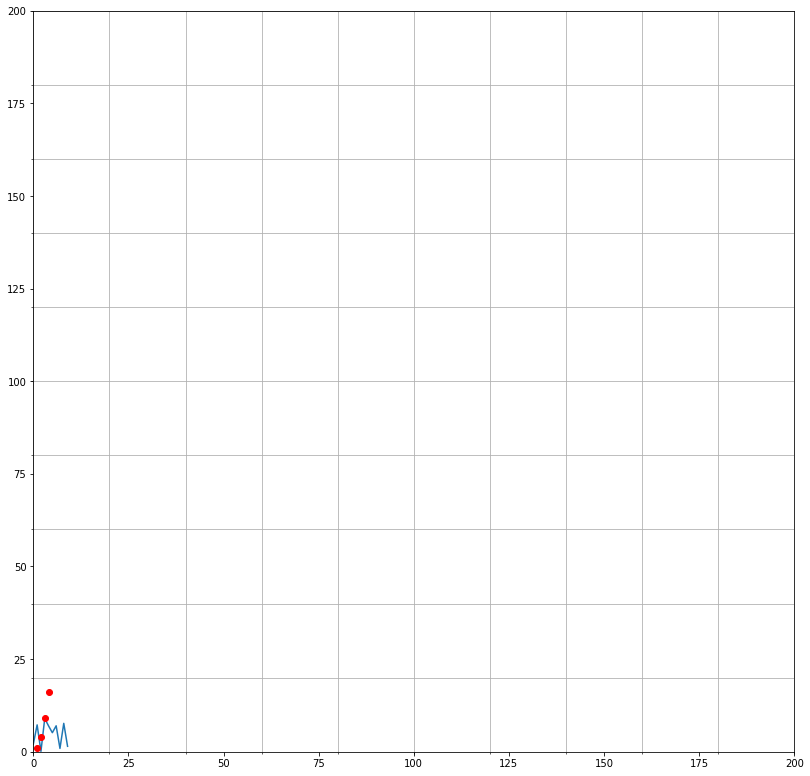

In [45]:
#this is testing plot
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np


fig = plt.figure(figsize=(30, 30))#defining size
ax1 = fig.add_subplot(2,2,1)#adding a plot to figure


spacing = D # This can be your user specified spacing. 
minorLocator = MultipleLocator(spacing)
ax1.plot(9 * np.random.rand(10))#testing
ax1.plot([1,2,3,4], [1,4,9,16], 'ro')#testing
# Set minor tick locations.
ax1.yaxis.set_minor_locator(minorLocator)
ax1.xaxis.set_minor_locator(minorLocator)

plt.axis([0, L, 0, L])#defining axix x and y
# Set grid to use minor tick locations. 

ax1.grid(which = 'minor')#only major works fine

plt.show()

Now we need to process each zone

In each zone find Nzi random (x,y) with the zone limits and plot them

distribute R EH node at the corners of each node so it becomes 121 it hope

In [52]:
#this is for one zone we need to do it for all the zones
import random


rangeX = (0, 20)
rangeY = (0, 20)

# deltas = set()
# for x in range(1, 20):
#     for y in range(1, 20):
#         deltas.add((x,y))

randPoints = []
excluded = set()
i = 0
while i<D:
    x = random.randrange(*rangeX)
    y = random.randrange(*rangeY)
    if (x,y) in excluded: continue
    randPoints.append((x,y))
    i += 1
    excluded.update((x, y))
print(randPoints)
#https://stackoverflow.com/questions/19668463/generating-multiple-random-x-y-coordinates-excluding-duplicates

def getpoints(startx,starty,endx,endy):
    rangeX = (startx,endx)
    rangeY = (starty,endy)
    randPoints = []
    excluded = set()
    i = 0
    while i<D:
        x = random.randrange(*rangeX)
        y = random.randrange(*rangeY)
        if (x,y) in excluded: continue
        randPoints.append((x,y))
        i += 1
        excluded.update((x, y))
    return(randPoints)

[(15, 13), (13, 13), (5, 3), (15, 10), (19, 8), (16, 1), (15, 9), (16, 8), (6, 12), (3, 14), (19, 2), (2, 19), (13, 0), (1, 4), (12, 13), (1, 5), (4, 5), (5, 13), (3, 2), (8, 6)]


In [55]:
zonespoints = []
for i in range(0,int(math.sqrt(int(Z)))):#for y axis
    for j in range(0,int(math.sqrt(int(Z)))):#for x axis
        zonespoints.append(getpoints(j*20,i*20,(j+1)*20,(i+1)*20))

for i in zonespoints:
    print(i)

[(2, 6), (10, 12), (2, 11), (5, 19), (13, 15), (5, 11), (8, 5), (0, 17), (2, 18), (13, 6), (3, 5), (7, 8), (8, 17), (10, 11), (10, 18), (8, 14), (7, 17), (10, 11), (1, 10), (10, 0)]
[(25, 16), (33, 13), (33, 2), (38, 10), (36, 17), (33, 5), (21, 9), (26, 8), (32, 7), (25, 0), (25, 7), (36, 17), (23, 18), (23, 13), (27, 14), (33, 15), (32, 3), (35, 9), (35, 1), (38, 14)]
[(59, 8), (47, 4), (51, 4), (47, 4), (52, 8), (55, 11), (45, 5), (43, 9), (58, 11), (46, 0), (42, 0), (53, 11), (46, 16), (45, 7), (59, 6), (55, 9), (53, 19), (52, 6), (43, 9), (41, 9)]
[(67, 12), (78, 12), (75, 2), (78, 1), (68, 3), (68, 11), (70, 14), (63, 13), (66, 3), (76, 2), (64, 6), (62, 1), (61, 12), (71, 5), (62, 2), (74, 0), (77, 7), (70, 12), (61, 0), (70, 3)]
[(83, 5), (98, 1), (88, 18), (98, 13), (93, 1), (93, 14), (91, 2), (88, 4), (85, 6), (83, 6), (97, 5), (93, 7), (97, 2), (92, 6), (94, 4), (97, 3), (89, 5), (80, 4), (96, 14), (95, 9)]
[(100, 2), (108, 15), (114, 2), (107, 19), (113, 8), (113, 16), (105

### now perfectly we got the points,so what remains is ploting

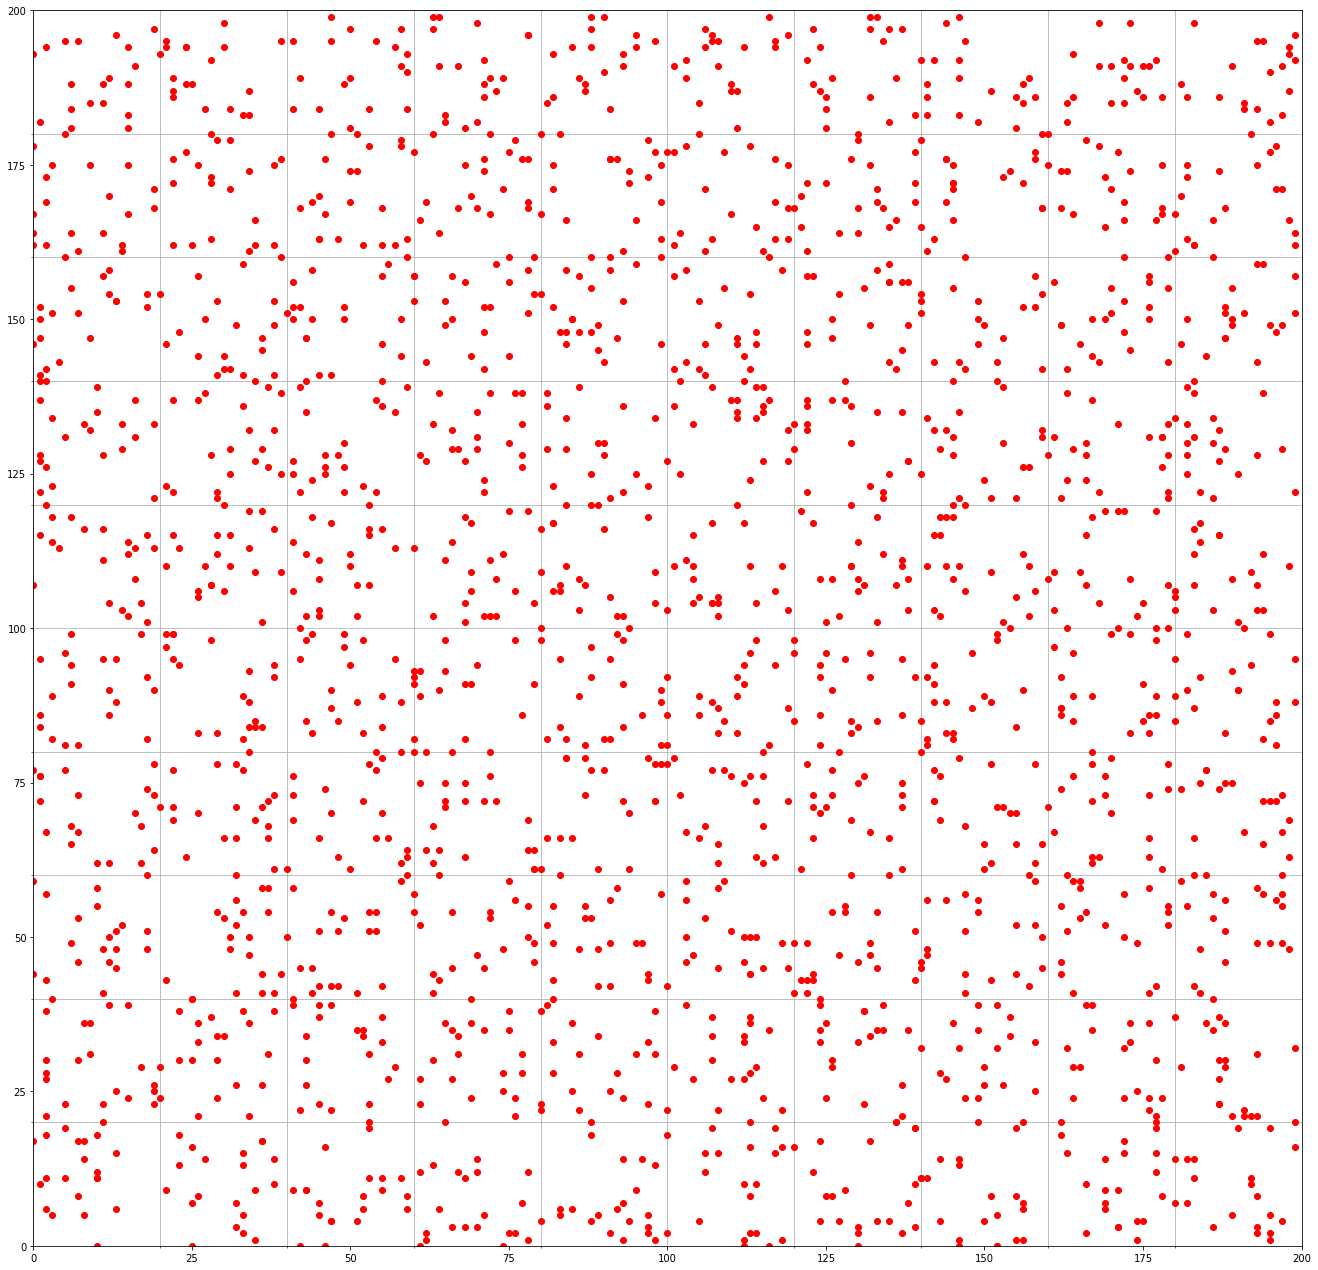

In [60]:
x = []
y = []
for i in zonespoints:
    for j in i:
        x.append(j[0])
        y.append(j[1])


#print(x,y)
fig = plt.figure(figsize=(50, 50))#defining size
ax1 = fig.add_subplot(2,2,1)#adding a plot to figure


spacing = D # This can be your user specified spacing. 
minorLocator = MultipleLocator(spacing)
ax1.plot(x,y, 'ro')#testing
# Set minor tick locations.
ax1.yaxis.set_minor_locator(minorLocator)
ax1.xaxis.set_minor_locator(minorLocator)

plt.axis([0, L, 0, L])#defining axix x and y
# Set grid to use minor tick locations. 

ax1.grid(which = 'minor')#only major works fine

plt.show()

In [65]:
#for each corner place a EH node
EH = []
for i in range(0,L+1,20):
    for j in range(0,L+1,20):
        EH.append((i,j))
print(EH)

EHx = []
EHy = []
for j in EH:
    EHx.append(j[0])
    EHy.append(j[1])
        
print(EHx,EHy)

[(0, 0), (0, 20), (0, 40), (0, 60), (0, 80), (0, 100), (0, 120), (0, 140), (0, 160), (0, 180), (0, 200), (20, 0), (20, 20), (20, 40), (20, 60), (20, 80), (20, 100), (20, 120), (20, 140), (20, 160), (20, 180), (20, 200), (40, 0), (40, 20), (40, 40), (40, 60), (40, 80), (40, 100), (40, 120), (40, 140), (40, 160), (40, 180), (40, 200), (60, 0), (60, 20), (60, 40), (60, 60), (60, 80), (60, 100), (60, 120), (60, 140), (60, 160), (60, 180), (60, 200), (80, 0), (80, 20), (80, 40), (80, 60), (80, 80), (80, 100), (80, 120), (80, 140), (80, 160), (80, 180), (80, 200), (100, 0), (100, 20), (100, 40), (100, 60), (100, 80), (100, 100), (100, 120), (100, 140), (100, 160), (100, 180), (100, 200), (120, 0), (120, 20), (120, 40), (120, 60), (120, 80), (120, 100), (120, 120), (120, 140), (120, 160), (120, 180), (120, 200), (140, 0), (140, 20), (140, 40), (140, 60), (140, 80), (140, 100), (140, 120), (140, 140), (140, 160), (140, 180), (140, 200), (160, 0), (160, 20), (160, 40), (160, 60), (160, 80), (16

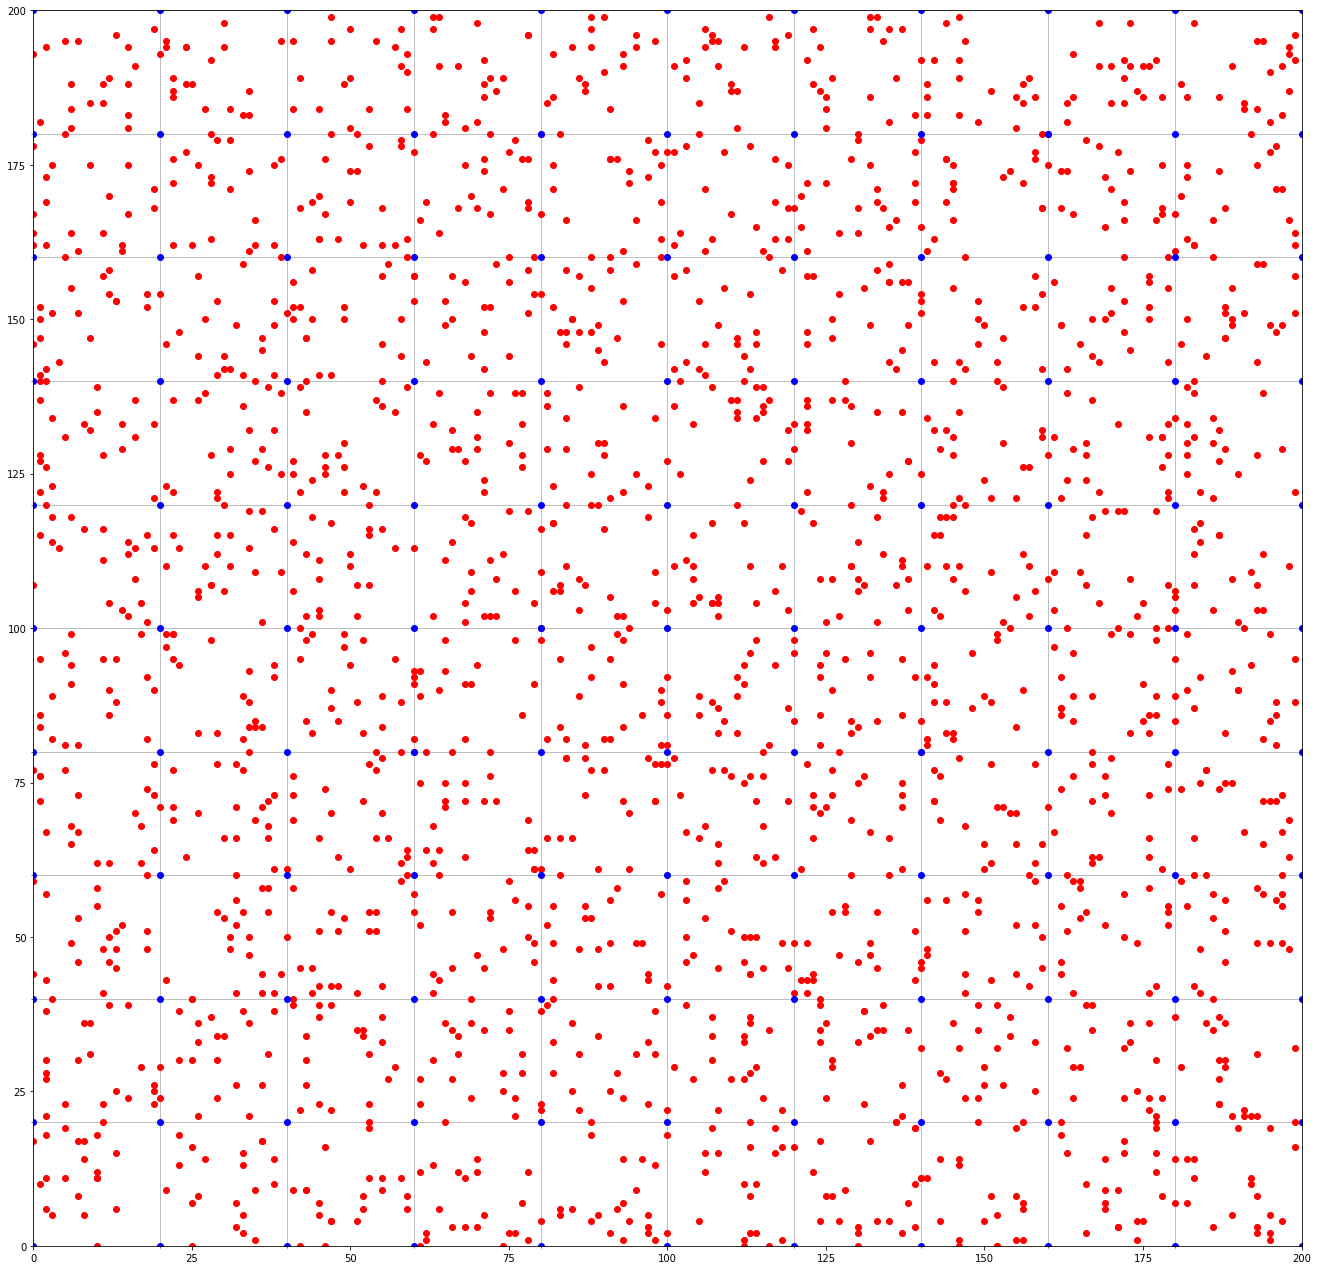

In [67]:
x = []
y = []
for i in zonespoints:
    for j in i:
        x.append(j[0])
        y.append(j[1])
        
#for each corner place a EH node
EH = []
for i in range(0,L+1,20):
    for j in range(0,L+1,20):
        EH.append((i,j))
#print(EH)

EHx = []
EHy = []
for j in EH:
    EHx.append(j[0])
    EHy.append(j[1])
        
#print(EHx,EHy)

#print(x,y)
fig = plt.figure(figsize=(50, 50))#defining size
ax1 = fig.add_subplot(2,2,1)#adding a plot to figure


spacing = D # This can be your user specified spacing. 
minorLocator = MultipleLocator(spacing)
ax1.plot(x,y, 'ro')#testing
ax1.plot(EHx,EHy,'bo')
# Set minor tick locations.
ax1.yaxis.set_minor_locator(minorLocator)
ax1.xaxis.set_minor_locator(minorLocator)

plt.axis([0, L, 0, L])#defining axix x and y
# Set grid to use minor tick locations. 

ax1.grid(which = 'minor')#only major works fine

plt.show()

### At last placing of LBS

for each bs in LBS
    
    place them in predefined location